# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Imam Waliyuddin Rabbani
- Email: imamwaliyuddinrabbani@gmail.com
- Id Dicoding: imamwaliyuddin

## Menentukan Pertanyaan Bisnis
1. Berapa jumlah total penyewaan sepeda pada tahun 2011 dan 2012?
2. Berapa rata-rata penyewaan sepeda per jam?
3. Pada bulan apa penyewaan sepeda paling banyak? 
4. Berapa banyak penyewaan sepeda yang dilakukan oleh pengguna terdaftar dibandingkan dengan pengguna kasual? 
5. Apakah ada korelasi antara suhu dan jumlah penyewaan sepeda?
6. Berapa banyak hari untuk tiap bulannya dalam dataset di mana lebih dari 1000 sepeda disewa?

## Menyiapkan Library

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tahap pertama adalah gathering data yang dimana membaca semua data yang ada, yaitu data Bike Sharig harian dan per-jam menggunakan library pandas.

Penjelasan tiap fitur:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [78]:
bike_day = pd.read_csv("data/day.csv")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
bike_hour = pd.read_csv("data/hour.csv")
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai dataset bike_day

In [80]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa tidak ada keanehan dalam dataset tersebut, namun untuk memastikan apakah ada nilai null atau tidak, saya tetap akan mengecek per dataset.

In [81]:
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Sudah dapat dipastikan bahwa dataset tidak ada nilai null. Maka proses bisa diteruskan.

In [82]:
print("Jumlah duplikasi: ", bike_day.duplicated().sum())

Jumlah duplikasi:  0


dataset tersebut terlihat tidak memiliki data duplikat

In [83]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada dataset tersebut

#### Menilai dataset bike_hour

In [84]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terlihat bahwa tidak ada keanehan dalam dataset tersebut, namun untuk memastikan apakah ada nilai null atau tidak, saya tetap akan mengecek per dataset.

In [85]:
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Sudah dapat dipastikan bahwa dataset tidak ada nilai null. Maka proses bisa diteruskan.

In [86]:
print("Jumlah duplikasi: ", bike_hour.duplicated().sum())

Jumlah duplikasi:  0


dataset tersebut terlihat tidak memiliki data duplikat

In [87]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada dataset tersebut

### Cleaning Data

Dikarenakan kedua dataset tidak ada kesalahan ataupun keanehan, maka tidak diperlukan proses Cleaning Data

## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Berapa jumlah total penyewaan sepeda pada tahun 2011 dan 2012?

In [88]:
total_rentals_2011 = bike_day[bike_day['yr'] == 0]['cnt'].sum()
total_rentals_2012 = bike_day[bike_day['yr'] == 1]['cnt'].sum()
f_total_rentals_2011 = '{:,.0f}'.format(total_rentals_2011)
f_total_rentals_2012 = '{:,.0f}'.format(total_rentals_2012)

print(f_total_rentals_2011)
print(f_total_rentals_2012)

1,243,103
2,049,576


Terlihat bahwa total penyewaan sepeda pada tahun 2011 berjumlah 1.234.103. Sedangkan pada tahun 2012 berjumlah 2.049.576.

### Pertanyaan 2: Berapa rata-rata penyewaan sepeda per jam?

In [89]:
average_rentals_per_hour = bike_hour.groupby('hr')['cnt'].mean()

print(average_rentals_per_hour)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


Terlihat rata-rata penyewaan sepeda tiap jamnya yang dimana penyewaan terdikit pada jam ke 4 dan penyewaan terbanyak pada jam ke 17.

### Pertanyaan 3: Pada bulan apa penyewaan sepeda paling banyak? 

In [90]:
bike_day['date'] = pd.to_datetime(bike_day['dteday'])
bike_day['year_month'] = bike_day['date'].dt.to_period('M')

most_rentals_month_year = bike_day.groupby('year_month')['cnt'].sum()
print(most_rentals_month_year)

year_month
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Freq: M, Name: cnt, dtype: int64


Terlihat penyewaan sepeda tiap bulannya yang dimana penyewaan sepeda terbanyak yaitu pada bulan ke 9 tahun 2012 dengan jumlah 218.573.

### Pertanyaan 4: Berapa banyak penyewaan sepeda yang dilakukan oleh pengguna terdaftar dibandingkan dengan pengguna kasual?  

In [91]:
total_registered_rentals = bike_day['registered'].sum()
total_casual_rentals = bike_day['casual'].sum()
print(total_casual_rentals)
print(total_registered_rentals)

620017
2672662


Terlihat bahwa penyewaaan sepeda oleh pengguna terdaftar lebih banyak dibandingkan penyewaan sepeda oleh pengguna kasual, dimana jumlah penyewa oleh pengguna terdaftar sebesar 2.672.662, sedangkan jumlah penyewa oleh pengguna kasual sebesar 620.017.

### Pertanyaan 5: Apakah ada korelasi antara suhu dan jumlah penyewaan sepeda?

In [92]:
correlation_temp_cnt = bike_day['temp'].corr(bike_day['cnt'])
correlation_feel_temp_cnt = bike_day['atemp'].corr(bike_day['cnt'])
print(correlation_temp_cnt)
print(correlation_feel_temp_cnt)

0.6274940090334918
0.6310656998491814


Terlihat bahwa terdapat korelasi positif yang cukup tinggi diantara suhu biasa maupun suhu yang dirasakan terhadap jumlah penyewaan, yaitu sebesar 0,63 untuk suhu biasa dan 0,63 untuk suhu yang dirasakan.

### Pertanyaan 6: Berapa banyak hari untuk tiap bulannya dalam dataset di mana lebih dari 1000 sepeda disewa?

In [93]:
bike_day['date'] = pd.to_datetime(bike_day['dteday']).dt.date
days_with_more_than_1000_rentals = bike_day[bike_day['cnt'] > 1000].groupby(['year_month']).size()
print(days_with_more_than_1000_rentals)

year_month
2011-01    21
2011-02    28
2011-03    29
2011-04    29
2011-05    31
2011-06    30
2011-07    31
2011-08    31
2011-09    30
2011-10    30
2011-11    30
2011-12    29
2012-01    31
2012-02    29
2012-03    31
2012-04    30
2012-05    31
2012-06    30
2012-07    31
2012-08    31
2012-09    30
2012-10    30
2012-11    30
2012-12    29
Freq: M, dtype: int64


Terlihat bahwa jumlah hari yang dimana jumlah penyewaan sepeda lebih dari 1000 untuk tiap bulannya, paling sedikit yaitu pada bulan 1 tahun 2011 yang hanya terdapat 21 hari yang memiliki penyewaan lebih dari 1000. Sedangkan terdapat 8 bulan yang memiliki 31 hari yang terdapat penyewaan lebih dari 1000.

## Visualization & Explanatory Analysis

Berikut beberapa visualisasi untuk menjawab beberapa pertanyaan yang ada

### Pertanyaan 1: Berapa jumlah total penyewaan sepeda pada tahun 2011 dan 2012?

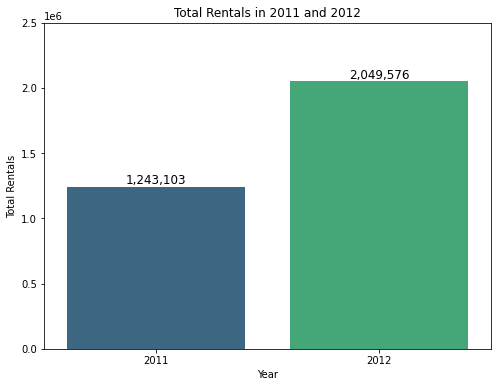

In [94]:
# Data total rentals
years = ['2011', '2012']
total_rentals = [total_rentals_2011, total_rentals_2012]

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=years, y=total_rentals, palette='viridis')
plt.title('Total Rentals in 2011 and 2012')
plt.xlabel('Year')
plt.ylabel('Total Rentals')

# Menambahkan label di atas bar
for i, total in enumerate(total_rentals):
    plt.text(i, total, f'{total:,}', ha='center', va='bottom', fontsize=12)
plt.ylim(0, 2500000)

# Menampilkan grafik
plt.show()

Terlihat bahwa total penyewaan sepeda pada tahun 2011 berjumlah 1.234.103. Sedangkan pada tahun 2012 berjumlah 2.049.576.

### Pertanyaan 2: Berapa rata-rata penyewaan sepeda per jam?

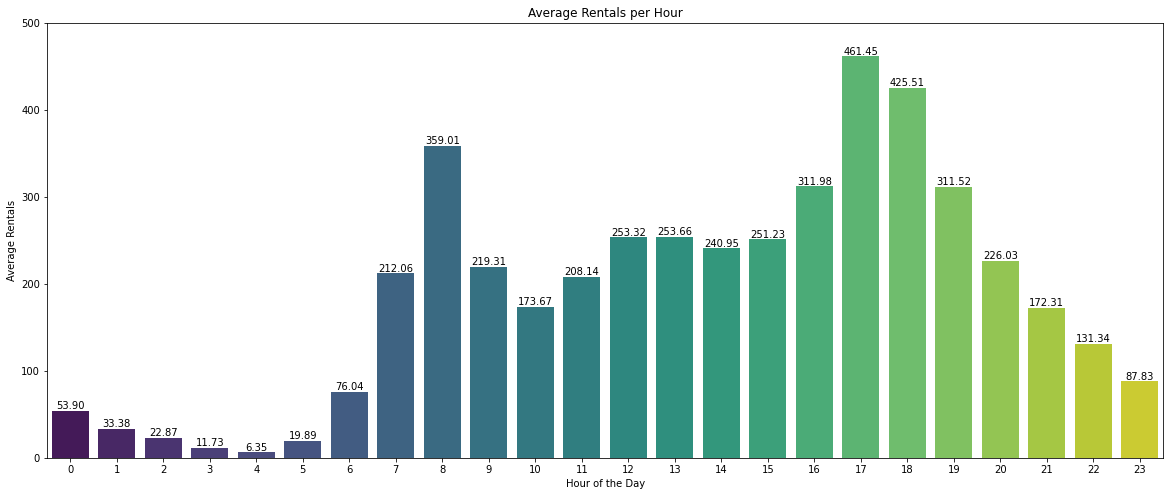

In [95]:
# Data rata-rata sewa per jam
hours = average_rentals_per_hour.index
average_rentals = average_rentals_per_hour.values

# Membuat bar chart
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=hours, y=average_rentals, palette='viridis')
plt.title('Average Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')

# Menambahkan label di atas setiap batang
for i, avg_rental in enumerate(average_rentals):
    ax.text(i, avg_rental, f'{avg_rental:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 500)

# Menampilkan grafik
plt.show()

Terlihat rata-rata penyewaan sepeda tiap jamnya yang dimana penyewaan terdikit pada jam ke 4 dan penyewaan terbanyak pada jam ke 17.

### Pertanyaan 3: Pada bulan apa penyewaan sepeda paling banyak? 

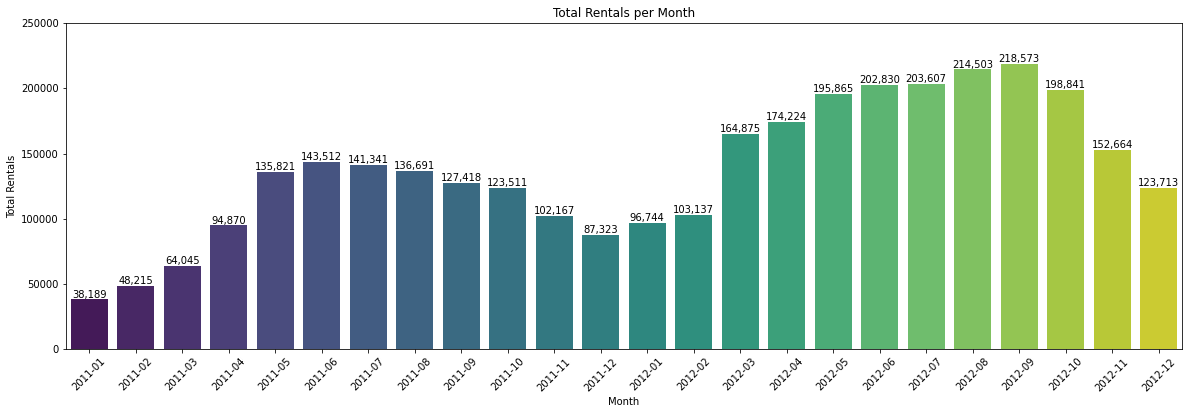

In [96]:
# Data total sewa per bulan dan tahun
months = most_rentals_month_year.index.strftime('%Y-%m')
total_rentals = most_rentals_month_year.values

# Membuat bar chart
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=months, y=total_rentals, palette='viridis')
plt.title('Total Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)  

# Menambahkan label di atas setiap batang
for i, total in enumerate(total_rentals):
    ax.text(i, total, f'{total:,}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 250000)

# Menampilkan grafik
plt.show()

Terlihat penyewaan sepeda tiap bulannya yang dimana penyewaan sepeda terbanyak yaitu pada bulan ke 9 tahun 2012 dengan jumlah 218.573.

### Pertanyaan 4: Berapa banyak penyewaan sepeda yang dilakukan oleh pengguna terdaftar dibandingkan dengan pengguna kasual?  

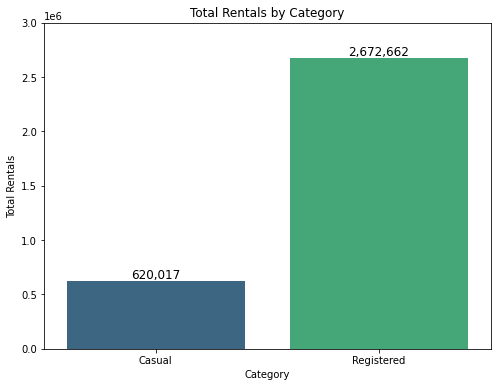

In [97]:
# Data total sewa casual dan registered
categories = ['Casual', 'Registered']
totals = [total_casual_rentals, total_registered_rentals]

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=totals, palette='viridis')
plt.title('Total Rentals by Category')
plt.xlabel('Category')
plt.ylabel('Total Rentals')

# Menambahkan label di atas setiap batang
for i, total in enumerate(totals):
    plt.text(i, total, f'{total:,}', ha='center', va='bottom', fontsize=12)
plt.ylim(0, 3000000)

# Menampilkan grafik
plt.show()

Terlihat bahwa penyewaaan sepeda oleh pengguna terdaftar lebih banyak dibandingkan penyewaan sepeda oleh pengguna kasual, dimana jumlah penyewa oleh pengguna terdaftar sebesar 2.672.662, sedangkan jumlah penyewa oleh pengguna kasual sebesar 620.017.

### Pertanyaan 5: Apakah ada korelasi antara suhu dan jumlah penyewaan sepeda?

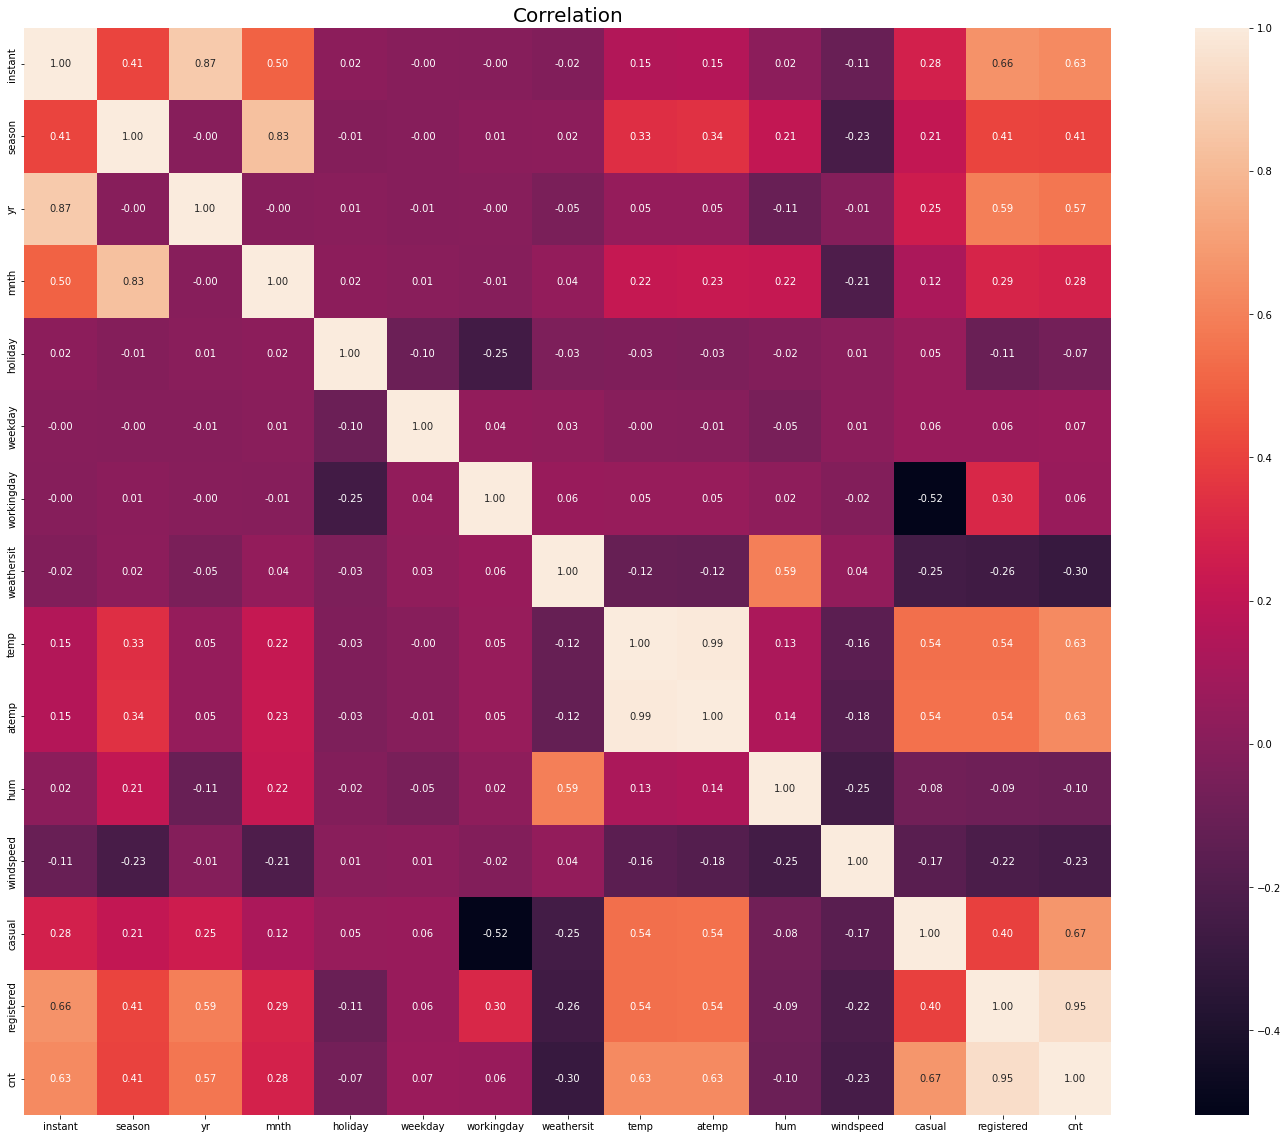

In [98]:
plt.figure(figsize = (30,20))
sns.heatmap(bike_day.corr(), annot=True, square=True, fmt='.2f')
plt.title('Correlation', fontsize = 20)
plt.show()

Pda visualisasi yang diberikan, dapat terlihat korelasi antara tiap fitur/kolom. Namun terlihat bahwa terdapat korelasi positif yang cukup tinggi diantara suhu biasa maupun suhu yang dirasakan terhadap jumlah penyewaan, yaitu sebesar 0,63 untuk suhu biasa dan 0,63 untuk suhu yang dirasakan.

### Pertanyaan 6: Berapa banyak hari untuk tiap bulannya dalam dataset di mana lebih dari 1000 sepeda disewa?

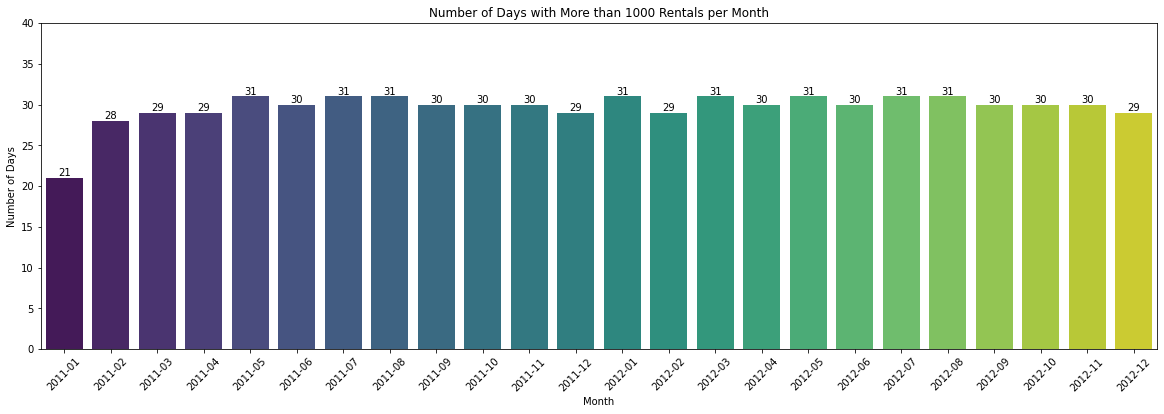

In [99]:
# Data jumlah hari dengan lebih dari 1000 sewaan per bulan dan tahun
months = days_with_more_than_1000_rentals.index.strftime('%Y-%m')
num_of_days = days_with_more_than_1000_rentals.values

# Membuat bar chart
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=months, y=num_of_days, palette='viridis')
plt.title('Number of Days with More than 1000 Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)  # Untuk memutar label bulan agar lebih mudah dibaca

# Menambahkan label di atas setiap batang
for i, num_days in enumerate(num_of_days):
    ax.text(i, num_days, f'{num_days}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 40)
# Menampilkan grafik
plt.show()

Terlihat bahwa jumlah hari yang dimana jumlah penyewaan sepeda lebih dari 1000 untuk tiap bulannya, paling sedikit yaitu pada bulan 1 tahun 2011 yang hanya terdapat 21 hari yang memiliki penyewaan lebih dari 1000. Sedangkan terdapat 8 bulan yang memiliki 31 hari yang terdapat penyewaan lebih dari 1000.

## Conclusion

### Pertanyaan 1
Setelah dilakukan EDA dan visualisasi data, maka dapat dijawab pertanyaan 1 bahwa: Total penyewaan sepeda pada tahun 2011 berjumlah 1.234.103. Sedangkan pada tahun 2012 berjumlah 2.049.576.

### Pertanyaan 2
Setelah dilakukan EDA dan visualisasi data, maka dapat dijawab pertanyaan 2 bahwa: Rata-rata penyewaan sepeda tiap jamnya yang dimana penyewaan terdikit pada jam ke 4 dan penyewaan terbanyak pada jam ke 17.

### Pertanyaan 3
Setelah dilakukan EDA dan visualisasi data, maka dapat dijawab pertanyaan 3 bahwa: Penyewaan sepeda tiap bulannya yang dimana penyewaan sepeda terbanyak yaitu pada bulan ke 9 tahun 2012 dengan jumlah 218.573.

### Pertanyaan 4
Setelah dilakukan EDA dan visualisasi data, maka dapat dijawab pertanyaan 4 bahwa: Penyewaaan sepeda oleh pengguna terdaftar lebih banyak dibandingkan penyewaan sepeda oleh pengguna kasual, dimana jumlah penyewa oleh pengguna terdaftar sebesar 2.672.662, sedangkan jumlah penyewa oleh pengguna kasual sebesar 620.017.

### Pertanyaan 5
Setelah dilakukan EDA dan visualisasi data, maka dapat dijawab pertanyaan 5 bahwa: Terdapat korelasi positif yang cukup tinggi diantara suhu biasa maupun suhu yang dirasakan terhadap jumlah penyewaan, yaitu sebesar 0,63 untuk suhu biasa dan 0,63 untuk suhu yang dirasakan.

### Pertanyaan 6
Setelah dilakukan EDA dan visualisasi data, maka dapat dijawab pertanyaan 6 bahwa: Jumlah hari yang dimana jumlah penyewaan sepeda lebih dari 1000 untuk tiap bulannya, paling sedikit yaitu pada bulan 1 tahun 2011 yang hanya terdapat 21 hari yang memiliki penyewaan lebih dari 1000. Sedangkan terdapat 8 bulan yang memiliki 31 hari yang terdapat penyewaan lebih dari 1000.